# Classification by XGBClassifier

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Hsin Hao Hsieh and Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
### load required packages
import numpy as np
import matplotlib.pyplot as plt

## Introduction to digits dataset

The data set can be loaded by  
```Python
from sklearn.datasets import load_digits
digits = load_digits()
```  

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

This `digits` contains several keys.

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Found the information about this data set by `digits['DESCRE'].  
(You may find the soruce of the data set inside.)

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

`digits['data']` is an array of shape `(1797, 64)`  
and its entries range from 0 to 16

In [5]:
data = digits['data']
data.shape

(1797, 64)

`digits['image']` is an array of shape `(1797, 8, 8)`

In [6]:
images = digits['images']
images.shape

(1797, 8, 8)

The `i`-th data `data[i]`  
is the flattened vector of shape `(64,)`  
from the `i`-th image `images[i]`  
of shape `(8, 8)`

In [7]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
images[0] ### can you guess the digit?

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

`digits['target']` is the label of each picture

In [9]:
target = digits['target']
target.shape

(1797,)

### Handling pictures

A gray-scale picture is  
the same as a two-dimensional array.  

Here we use the colormap `Greys`.  
See a list of colormaps [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).  
(Sometimes one might choose `Greys_r` to flip black and white.)

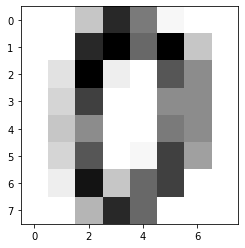

In [10]:
plt.imshow(images[0], cmap='Greys')

If you want to see many pictures at the same time  
use `plt.subplots`.

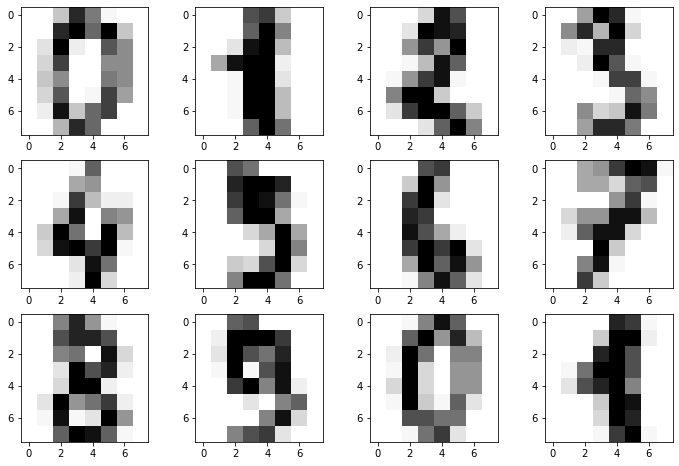

In [11]:
fig,axs = plt.subplots(3, 4, figsize=(12,8))
for i in range(3):
    for j in range(4):
        k = 4*i + j
        axs[i,j].imshow(images[k], cmap='Greys')

If preferred,  
use `[axes].axis('off')` to remove the coordinates and  
use `[axes].set_title([title_string])` to set the title.

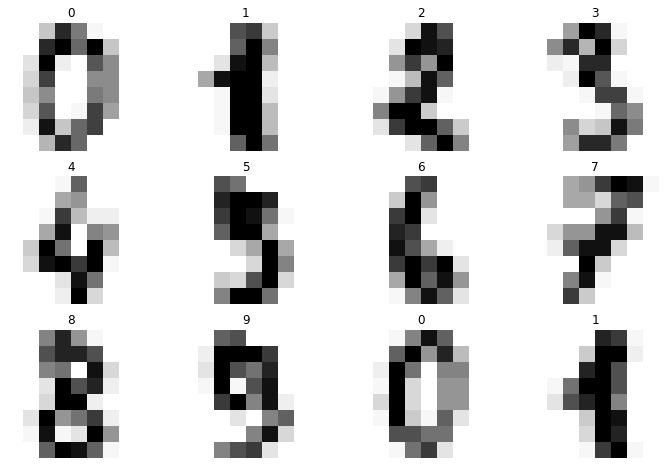

In [12]:
fig,axs = plt.subplots(3, 4, figsize=(12,8))
for i in range(3):
    for j in range(4):
        k = 4*i + j
        axs[i,j].axis('off')
        axs[i,j].set_title(target[k])
        axs[i,j].imshow(images[k], cmap='Greys')

### Switching between different shapes

In [13]:
vec = data[0]
pic = images[0]
print(vec.shape)
print(pic.shape)

(64,)
(8, 8)


Use `np.reshape` to convert  
a vector to a two-dimensional array.

In [14]:
vec.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
np.all(pic == vec.reshape(8,8))

True

There are several ways to flatten a two-dimensional array:  
`pic.ravel()`  
`pic.reshape(-1)`  
`pic.flatten()`
all have the same effect.

In [16]:
pic.ravel()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
pic.reshape(-1)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [18]:
pic.flatten()

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [19]:
np.all(vec == pic.ravel())

True

## XGBClassifier model

[XGBoost](https://xgboost.readthedocs.io/en/latest/) is  
a library that implements various machine learning algorithms  
under the **gradient tree boosting** framework.  

[XGBoost Tutorial](https://xgboost.readthedocs.io/en/latest/tutorials/index.html)

Use  
```Python
pip install xgboost --user
```
to install.  

See the [Installation Guide](https://xgboost.readthedocs.io/en/latest/build.html).

For the theory and details behind it,  
see [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754).

Use  
```Pythotn
import xgboost as xgb
```
to import XGBoost.

In [20]:
import xgboost as xgb

The current version  
contains an experimental scikit-learn API.  

It includes two functions    
`xgb.XGBClassifier`, `xgb.XGBRegressor`  
and more.

Before training, let's partition the data into training and test data.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [23]:
X_train.shape

(1347, 64)

In [24]:
X_test.shape

(450, 64)

The scikit-learn API  
make it easy for users who is familiar with scikit-learn,  
since it follows the same steps.

In [25]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

Use `accuracy_score` to see the performance.

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.9533333333333334

## Make a prediction of your own drawing

You may create a hand-written digit  
through some online whiteboard.

For example, go to [sketch.io](https://sketch.io/sketchpad/),  
select a pen you like,  
draw a digit,  
and then download the region as a png file.

You may also try [AutoDraw](https://www.autodraw.com/).  
Use the setting button on the top-left corner to choose a square paper,  
draw a digit,  
and then download the paper as a png file.

Say your file is called `my_digit.png`.  
Use `plt.read` to load it.

In [27]:
from PIL import Image

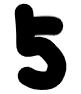

In [28]:
img = Image.open('my_digit.png')
img

In [29]:
img = img.resize((8,8)) ### change file to 8x8
a = np.array(img).mean(axis=-1) ### convert to an gray-scale
a = (255 - a) / 255 * 16 ### scale the entries to 0~16
a = a.astype(int) ### change data type to integer
a

array([[ 0,  0, 12,  0,  0,  0,  0,  0],
       [ 0, 11, 12, 12, 12,  8,  0,  0],
       [ 0,  0, 12, 12, 12, 12,  0,  0],
       [ 0,  0, 12, 12, 12,  0,  0,  0],
       [ 0,  0, 12, 12, 12, 12,  0,  0],
       [ 0,  0,  0,  0,  0, 12, 12,  0],
       [ 0,  0, 12, 12, 12, 12,  0,  0],
       [ 0,  0,  0, 12, 12,  0,  0,  0]])

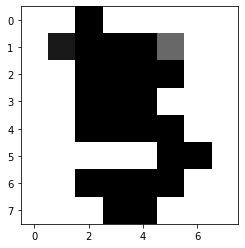

In [30]:
plt.imshow(a, cmap='Greys')

In [31]:
my_data = a.reshape(1,64)

In [32]:
model.predict(my_data)

array([8])

Probably that's not the right answer?  
That's the reality, lol.

## Cross-validation and hyperparameter

### Cross-validation

![cross validation](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/KfoldCV.gif/640px-KfoldCV.gif)  
(Source: Cross-validation (statistics) - Wikipedia  
MBanuelos22 / [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0))

Cross-validation means  
to train-test split the data in different ways   
and compare the performances.  

A standard way is called **$k$-fold cross-validation**  
as shown in the picture above.

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_score = cross_val_score(model, data, target, cv=5)
cv_score

array([0.925     , 0.88888889, 0.94707521, 0.94150418, 0.88857939])

The average score can be an index  
for the performance of a model.

In [35]:
cv_score.mean()

0.9182095326524295

### Hyperparameters in XGBoost
Use `xgb.XGBClassifier?` to read the parameters.

In [36]:
xgb.XGBClassifier?

`max_depth`: int;  Maximum tree depth for base learners.  
`learning_rate`: float;  Boosting learning rate (xgb's "eta" $\eta$)  
`subsample`: float;  Subsample ratio of the training instances.  
`colsample_bytree`: float;  Subsample ratio of columns when constructing each tree.  
`n_estimators`: Tune the number of trees.  
`reg_alpha`: float;  L1 regularization term on weights (xgb's alpha)

See a list [here](https://xgboost.readthedocs.io/en/latest/parameter.html).

Recall that we chose the default parameters  
by `model = xgb.XGBClassifier()`.  

Once the model is trained,  
use `model.get_params()` to   
to see the parameters in use.

In [37]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
model.get_params()

{'objective': 'multi:softprob',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

Use grid-search to search for  
a good combination of hypterparameters.

In [42]:
### set the possible choices of parameters
choices = {'learning_rate': [0.1, 0.3], 
           'max_depth': [4, 6, 8], 
           'reg_lambda': [1, 2],
          }

Import the `GridSearchCV` function  
from `sklearn.model_selection`.

In [43]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` only finishes  
the setup step, and  
it requires `fit` to complete the search.

In [44]:
model = xgb.XGBClassifier()
grid = GridSearchCV(model, cv=5, 
                    param_grid=choices)
grid

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [45]:
grid.fit(data, target)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [46]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'reg_lambda': 2}